# Ames Housing Prices Project - PART 2 - EDA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

In [2]:
pd.set_option("display.max_columns", 100)

# Load the data

In [3]:
clean_data = pd.read_csv("C:/Users/meykevandenbos/Documents/Meyke persoonlijk/Techionista/ML/House Prices/clean_data.csv")

In [4]:
clean_data.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,8450,Pave,NaN,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,1,2,20,RL,9600,Pave,NaN,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,2,3,60,RL,11250,Pave,NaN,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,3,4,70,RL,9550,Pave,NaN,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,4,5,60,RL,14260,Pave,NaN,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [5]:
del clean_data['Unnamed: 0']

In [6]:
continuous = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
              '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea','GarageArea', 'WoodDeckSF', 'OpenPorchSF',
              'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

discrete = ['Id','MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'BedroomAbvGr', 'YearRemodAdd', 
           'BsmtFullBath',  'BsmtHalfBath', 'FullBath','HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
           'GarageCars','MoSold','YrSold']

ordinal = ['ExterQual', 'ExterCond' , 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC' ,  
          'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageCond', 'GarageQual', 'PoolQC', 'Fence', 'LotShape',
          'LandContour' , 'LandSlope', 'Functional' , 'BsmtFinType1' , 'BsmtFinType2']

nominal = ['MSZoning', 'Street', 'Alley',  'LotConfig',  'Neighborhood', 'Condition1', 'Condition2',
          'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
          'Foundation',  'Heating','CentralAir', 'Electrical','GarageType', 'PavedDrive', 'MiscFeature',
          'SaleType', 'SaleCondition']

dependent = ['SalePrice']

In [7]:
clean_data[continuous].head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,8450,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,548.0,0,61,0,0,0,0,0
1,9600,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,460.0,298,0,0,0,0,0,0
2,11250,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,608.0,0,42,0,0,0,0,0
3,9550,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,642.0,0,35,272,0,0,0,0
4,14260,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,836.0,192,84,0,0,0,0,0


In [8]:
clean_data['MiscFeature'] = clean_data['MiscFeature'].fillna('NotA')
clean_data['Alley'] = clean_data['Alley'].fillna('NotA')
clean_data['GarageType'] = clean_data['GarageType'].fillna('NotA')
clean_data['PoolQC'] = clean_data['PoolQC'].fillna('NotA')
clean_data['Fence'] = clean_data['Fence'].fillna('NotA')
clean_data['FireplaceQu'] = clean_data['FireplaceQu'].fillna('NotA')
clean_data['GarageCond'] = clean_data['GarageCond'].fillna('NotA')
clean_data['GarageQual'] = clean_data['GarageQual'].fillna('NotA')
clean_data['GarageFinish'] = clean_data['GarageFinish'].fillna('NotA')
clean_data['BsmtCond'] = clean_data['BsmtCond'].fillna('NotA')
clean_data['BsmtExposure'] = clean_data['BsmtExposure'].fillna('NotA')
clean_data['BsmtQual'] = clean_data['BsmtQual'].fillna('NotA')
clean_data['BsmtFinType2'] = clean_data['BsmtFinType2'].fillna('NotA')
clean_data['BsmtFinType1'] = clean_data['BsmtFinType1'].fillna('NotA')
clean_data['MasVnrType'] = clean_data['MasVnrType'].fillna('NotA')

In [9]:
clean_data.isna().sum().sort_values(ascending=False)

SalePrice       1459
BsmtQual           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
                ... 
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu        0
Id                 0
Length: 78, dtype: int64

In [10]:
def encode_ordinal_variables(df):
    df = df.copy()
    for column in df.columns:
        if column in ordinal:
            df[column] = df[column].astype('category')
            df[column] = df[column].cat.codes.astype(int)
    return df

In [11]:
clean_data = encode_ordinal_variables(clean_data)

In [12]:
clean_data[ordinal].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,GarageCond,GarageQual,PoolQC,Fence,LotShape,LandContour,LandSlope,Functional,BsmtFinType1,BsmtFinType2
0,2,4,2,4,3,0,2,3,2,5,5,3,4,3,3,0,6,2,6
1,3,4,2,4,1,0,3,5,2,5,5,3,4,3,3,0,6,0,6
2,2,4,2,4,2,0,2,5,2,5,5,3,4,0,3,0,6,2,6
3,3,4,4,1,3,2,2,2,3,5,5,3,4,0,3,0,6,0,6
4,2,4,2,4,0,0,2,5,2,5,5,3,4,0,3,0,6,2,6


## DEPENDENCIES

While checking for features that are dependent from one another, the following dependencies came up:
- TotalBsmtSF, equals the added values for BsmtFinSF1, BsmtFinSF2, BsmtUnSF
- GrLivArea, equals the added values for 1stFlrSF, 2ndFlrSF, LowQualFinSF

In [13]:
assert (clean_data['TotalBsmtSF'] == (clean_data['BsmtFinSF1'] + clean_data['BsmtFinSF2'] + clean_data['BsmtUnfSF'])).any(), "Not the same"

In [14]:
assert (clean_data['GrLivArea'] == (clean_data['1stFlrSF'] + clean_data['2ndFlrSF'] + clean_data['LowQualFinSF'] )).any(), "Not the same"

Let's also create a feature that holds the total area of the house: GrLivArea + TotalBsmtSF

In [15]:
clean_data['TotalSF'] = clean_data['TotalBsmtSF'] + clean_data['GrLivArea']

In [16]:
NewlyCreatedFeatures = ['TotalSF']

Let's create a feature that adds up the different porch area.

In [17]:
clean_data['TotalPorchArea'] = clean_data['OpenPorchSF'] + clean_data['EnclosedPorch'] + clean_data['3SsnPorch'] + clean_data['ScreenPorch']+ clean_data['WoodDeckSF']

In [18]:
NewlyCreatedFeatures.append('TotalPorchArea')

## Normalizing data

In order to be better able to compare data, I will use a box-cox transformation to normalize the values of certain continous data columns.

Many thanks to this blog post: https://medium.com/@patricklcavins/using-scipys-powertransformer-3e2b792fd712

In [19]:
continuous = continuous + NewlyCreatedFeatures

In [20]:
clean_data[continuous].head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF,TotalPorchArea
0,8450,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,548.0,0,61,0,0,0,0,0,2566.0,61
1,9600,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,460.0,298,0,0,0,0,0,0,2524.0,298
2,11250,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,608.0,0,42,0,0,0,0,0,2706.0,42
3,9550,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,642.0,0,35,272,0,0,0,0,2473.0,307
4,14260,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,836.0,192,84,0,0,0,0,0,3343.0,276


In [21]:
ToTransform = continuous
ToTransform = clean_data[continuous].describe().T
ToTransform = list(ToTransform[ToTransform['min'] > 0].index)
ToTransform

['LotArea', '1stFlrSF', 'GrLivArea', 'TotalSF']

In [22]:
new_transformed_columns = []
for column in ToTransform:
    X = clean_data[[column]]
    pt = PowerTransformer(method="box-cox", standardize=False) 
    #fit the column
    box_cox = pt.fit(X)
    #Check if the lambda is between -3 and 3
    lambda_ = box_cox.lambdas_
    if -3 <= lambda_ <= 3:
        new_column = f"{column} (box-cox)"
        clean_data[new_column] = (
            np.log(X) if lambda_ <= 0.001 else (((X ** lambda_) - 1) / lambda_)
        )
        new_transformed_columns.append(new_column)
        continuous.append(new_column)
    else:
        print(X, lambda_, "lambda not in range")

In [23]:
clean_data[new_transformed_columns].head()

,LotArea (box-cox),1stFlrSF (box-cox),GrLivArea (box-cox),TotalSF (box-cox)
0,17.233406,6.752270,7.444249,24.274473
1,17.650449,7.140453,7.140453,24.158678
2,18.178584,6.824374,7.487734,24.650449
3,17.633246,6.867974,7.448334,24.016107
4,18.988661,7.043160,7.695303,26.196741


In [24]:
ToTransform2 = dependent
ToTransform2 = clean_data[dependent].describe().T
ToTransform2 = list(ToTransform2[ToTransform2['min'] > 0].index)
ToTransform2

['SalePrice']

In [25]:
new_transformed_columns = []
for column in ToTransform2:
    X = clean_data[[column]]
    pt = PowerTransformer(method="box-cox", standardize=False) 
    #fit the column
    box_cox = pt.fit(X)
    #Check if the lambda is between -3 and 3
    lambda_ = box_cox.lambdas_
    if -3 <= lambda_ <= 3:
        new_column = f"{column} (box-cox)"
        clean_data[new_column] = (
            np.log(X) if lambda_ <= 0.001 else (((X ** lambda_) - 1) / lambda_)
        )
        new_transformed_columns.append(new_column)
        dependent.append(new_column)
    else:
        print(X, lambda_, "lambda not in range")

In [26]:
clean_data[new_transformed_columns].head()

,SalePrice (box-cox)
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216


## Correlation

I will use Pearson's correlation coefficient to calculate the correlations of the continuous variables, and Spearman's rank correlation coefficient for discrete and ordinal variables.

- uncorrelated = a correlation smaller than 0.1
- very weak correlation = a correlation between 0.1 and 0.33
- weak correlation = a correlation between 0.33 and 0.66
- strong correlation = a correlation above 0.66

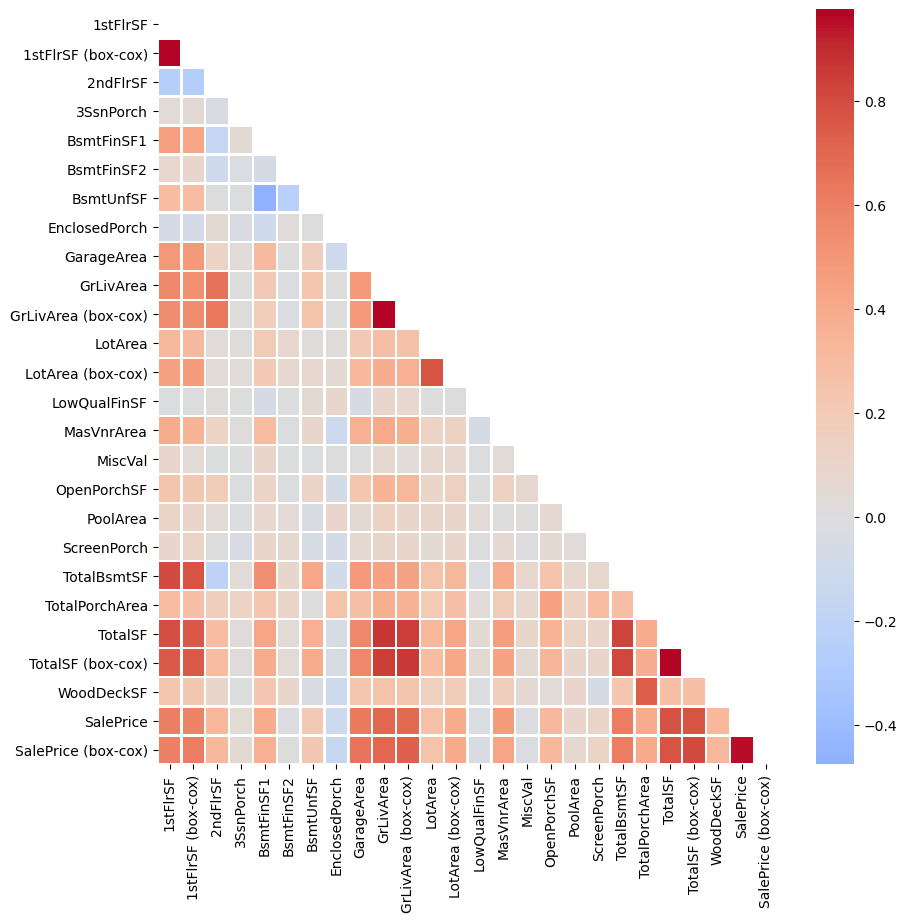

In [27]:
continuous_correlation = sorted(continuous) + dependent
correlation = clean_data[continuous_correlation].corr(method="pearson")
mask = np.triu(np.ones_like(correlation, dtype=bool))
fig = plt.figure(figsize=(10,10), dpi=100, facecolor = 'w', edgecolor="k")
figure = sns.heatmap(correlation, mask=mask, cmap= "coolwarm", center=0, linewidths=1, fmt=".2f")

In [28]:
strongly_correlated_SalePrice = []
for x in continuous:
    correlation = clean_data[[x,'SalePrice']].corr(method="pearson").abs()
    if correlation.iloc[0,1]> 0.65:
        strongly_correlated_SalePrice.append(x)
print(strongly_correlated_SalePrice)

['GrLivArea', 'TotalSF', 'GrLivArea (box-cox)', 'TotalSF (box-cox)']


In [29]:
strongly_correlated_SalePriceBC = []
for x in continuous:
    correlation = clean_data[[x,'SalePrice (box-cox)']].corr(method="pearson").abs()
    if correlation.iloc[0,1]> 0.65:
        strongly_correlated_SalePriceBC.append(x)
print(strongly_correlated_SalePriceBC)

['GrLivArea', 'GarageArea', 'TotalSF', 'GrLivArea (box-cox)', 'TotalSF (box-cox)']


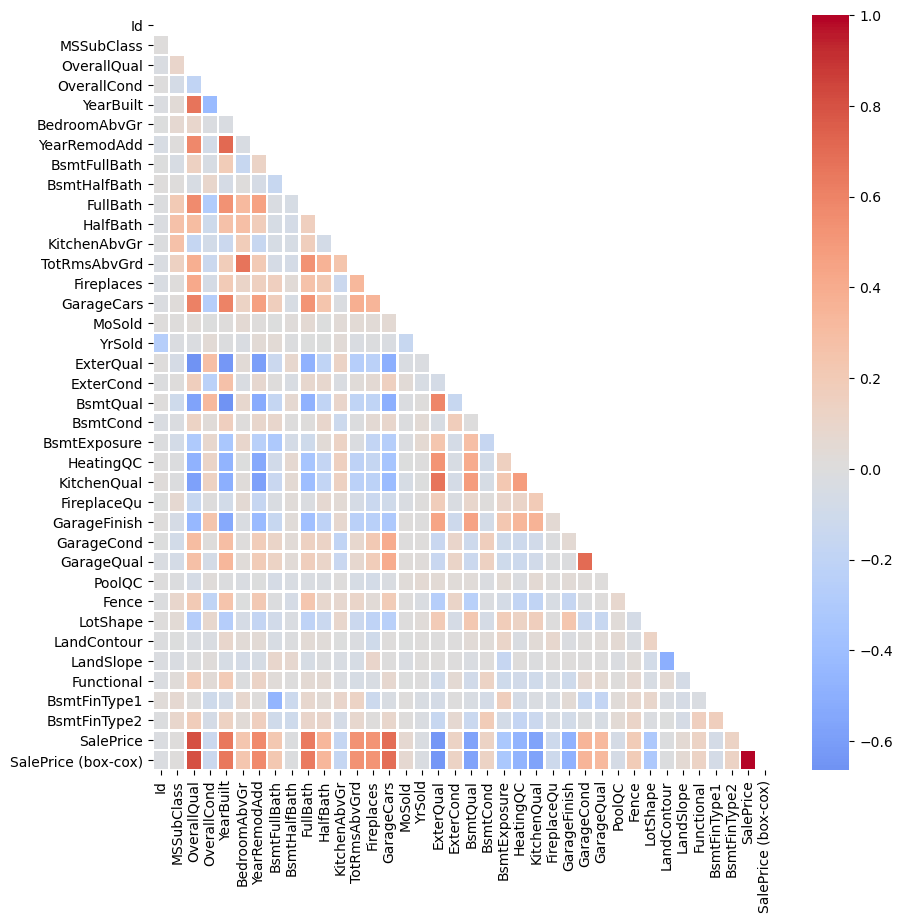

In [30]:
correlationDO = discrete + ordinal
correlationDO.append('SalePrice')
correlationDO.append('SalePrice (box-cox)')
correlation = clean_data[correlationDO].corr(method="spearman")
mask = np.triu(np.ones_like(correlation, dtype=bool))
fig = plt.figure(figsize=(10,10), dpi=100, facecolor = 'w', edgecolor="k")
figure = sns.heatmap(correlation, mask=mask, cmap= "coolwarm", center=0, linewidths=1, fmt=".2f")

In [31]:
#Let's also add the strongly correlated discrete variabeles to the list, if any
for x in discrete:
    correlation = clean_data[[x,'SalePrice']].corr(method="spearman").abs()
    if correlation.iloc[0,1]> 0.65:
        strongly_correlated_SalePrice.append(x)
print(strongly_correlated_SalePrice)

['GrLivArea', 'TotalSF', 'GrLivArea (box-cox)', 'TotalSF (box-cox)', 'OverallQual', 'YearBuilt', 'GarageCars']


In [32]:
#Let's also add the strongly correlated ordinal variabeles to the list, if any
for x in ordinal:
    correlation = clean_data[[x,'SalePrice']].corr(method="spearman").abs()
    if correlation.iloc[0,1]> 0.65:
        strongly_correlated_SalePrice.append(x)
print(strongly_correlated_SalePrice)

['GrLivArea', 'TotalSF', 'GrLivArea (box-cox)', 'TotalSF (box-cox)', 'OverallQual', 'YearBuilt', 'GarageCars']


In [33]:
#Let's also add the strongly correlated discrete variabeles to the list, if any
for x in discrete:
    correlation = clean_data[[x,'SalePrice (box-cox)']].corr(method="spearman").abs()
    if correlation.iloc[0,1]> 0.65:
        strongly_correlated_SalePriceBC.append(x)
print(strongly_correlated_SalePriceBC)

['GrLivArea', 'GarageArea', 'TotalSF', 'GrLivArea (box-cox)', 'TotalSF (box-cox)', 'OverallQual', 'YearBuilt', 'GarageCars']


In [34]:
#Let's also add the strongly correlated ordinal variabeles to the list, if any
for x in ordinal:
    correlation = clean_data[[x,'SalePrice (box-cox)']].corr(method="spearman").abs()
    if correlation.iloc[0,1]> 0.65:
        strongly_correlated_SalePriceBC.append(x)
print(strongly_correlated_SalePriceBC)

['GrLivArea', 'GarageArea', 'TotalSF', 'GrLivArea (box-cox)', 'TotalSF (box-cox)', 'OverallQual', 'YearBuilt', 'GarageCars']


In [35]:
#Let's compare the two lists: 
print(strongly_correlated_SalePrice)
print(strongly_correlated_SalePriceBC)

['GrLivArea', 'TotalSF', 'GrLivArea (box-cox)', 'TotalSF (box-cox)', 'OverallQual', 'YearBuilt', 'GarageCars']
['GrLivArea', 'GarageArea', 'TotalSF', 'GrLivArea (box-cox)', 'TotalSF (box-cox)', 'OverallQual', 'YearBuilt', 'GarageCars']


A comparison of the two lists tells us that for the box-cox SalePrice, there is one more highly correlated variable. For all the other variables SalePrice and SalePrice (box-cox) come to a similar conclusion about highly correlated variables. 

## Further Feature Engineering

There are several features that belong together since they all descrive a certain feature of the house. For example fireplaces or a swimming pool. I will capture each of these features in seperate dummy variable. A house either has a swimming pool, or it does not.  
- Has pool
- Has basement
- Has fireplace
- Has garage
- Has porch
- Has second floor
- Has first floor

In [36]:
clean_data['has_pool'] = clean_data.apply(lambda row: 1 if row['PoolArea'] > 0 else 0, axis=1)
clean_data['has_basement'] = clean_data.apply(lambda row: 1 if row['TotalBsmtSF'] > 0 else 0, axis=1)
clean_data['has_fireplace'] = clean_data.apply(lambda row: 1 if row['Fireplaces'] > 0 else 0, axis=1)
clean_data['has_garage'] = clean_data.apply(lambda row: 1 if row['GarageArea'] > 0 else 0, axis=1)
clean_data['has_porch'] = clean_data.apply(lambda row: 1 if row['TotalPorchArea'] > 0 else 0, axis=1)
clean_data['has_2ndfloor'] = clean_data.apply(lambda row: 1 if row['2ndFlrSF'] > 0 else 0, axis=1)
clean_data['has_1stfloor'] = clean_data.apply(lambda row: 1 if row['1stFlrSF'] > 0 else 0, axis=1)

In the dataset, the variables YearBuilt, YearRemodAdd and YrSold is incorporated. MoSold is also in the dataset, but I will drop that one since I do not think the month in which a house is sold will influence the price. 

To better be able to deal with the years, I will calculate the age of the house when it was sold, as well as the age of the remodelling. Both features will replace the original ones.

In [37]:
clean_data['AgeHouse'] = clean_data['YrSold'] - clean_data['YearBuilt']
clean_data['AgeRemod'] = clean_data['YrSold'] - clean_data['YearRemodAdd']

In [38]:
del clean_data['YrSold']
del clean_data['MoSold']
del clean_data['YearBuilt']
del clean_data['YearRemodAdd']

In [39]:
clean_data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchArea,LotArea (box-cox),1stFlrSF (box-cox),GrLivArea (box-cox),TotalSF (box-cox),SalePrice (box-cox),has_pool,has_basement,has_fireplace,has_garage,has_porch,has_2ndfloor,has_1stfloor,AgeHouse,AgeRemod
0,1,60,RL,8450,Pave,NotA,3,3,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2,4,PConc,2,4,3,2,706.0,6,0.0,150.0,856.0,GasA,0,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,3,Attchd,2,2.0,548.0,5,5,Y,0,61,0,0,0,0,3,4,NotA,0,WD,Normal,208500.0,2566.0,61,17.233406,6.752270,7.444249,24.274473,12.247694,0,1,0,1,1,1,1,5,5
1,2,20,RL,9600,Pave,NotA,3,3,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,4,CBlock,2,4,1,0,978.0,6,0.0,284.0,1262.0,GasA,0,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,5,Attchd,2,2.0,460.0,5,5,Y,298,0,0,0,0,0,3,4,NotA,0,WD,Normal,181500.0,2524.0,298,17.650449,7.140453,7.140453,24.158678,12.109011,0,1,1,1,1,0,1,31,31
2,3,60,RL,11250,Pave,NotA,0,3,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2,4,PConc,2,4,2,2,486.0,6,0.0,434.0,920.0,GasA,0,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,5,Attchd,2,2.0,608.0,5,5,Y,0,42,0,0,0,0,3,4,NotA,0,WD,Normal,223500.0,2706.0,42,18.178584,6.824374,7.487734,24.650449,12.317167,0,1,1,1,1,1,1,7,6
3,4,70,RL,9550,Pave,NotA,0,3,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,4,BrkTil,4,1,3,0,216.0,6,0.0,540.0,756.0,GasA,2,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,Detchd,3,3.0,642.0,5,5,Y,0,35,272,0,0,0,3,4,NotA,0,WD,Abnorml,140000.0,2473.0,307,17.633246,6.867974,7.448334,24.016107,11.849398,0,1,1,1,1,1,1,91,36
4,5,60,RL,14260,Pave,NotA,0,3,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2,4,PConc,2,4,0,2,655.0,6,0.0,490.0,1145.0,GasA,0,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,5,Attchd,2,3.0,836.0,5,5,Y,192,84,0,0,0,0,3,4,NotA,0,WD,Normal,250000.0,3343.0,276,18.988661,7.043160,7.695303,26.196741,12.429216,0,1,1,1,1,1,1,8,8


## Visualise to decide to keep or get rid of features

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

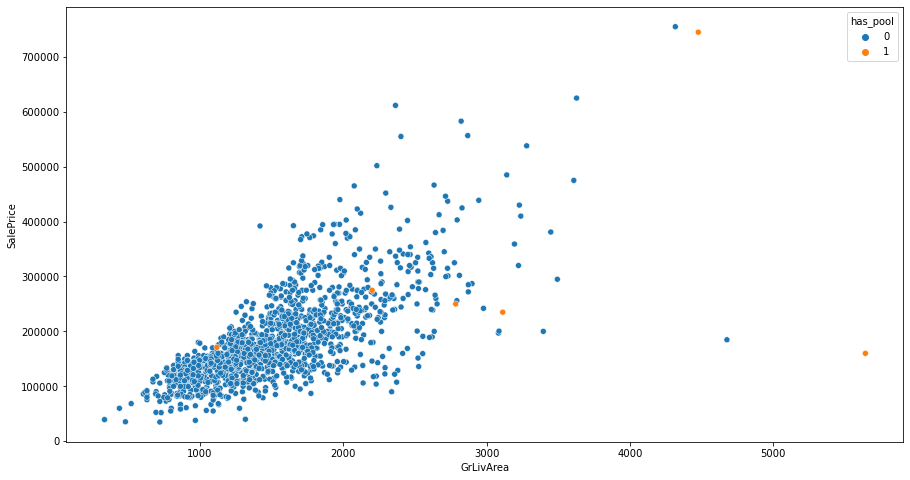

In [40]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="has_pool", data=clean_data)

In [41]:
del clean_data['has_pool']

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

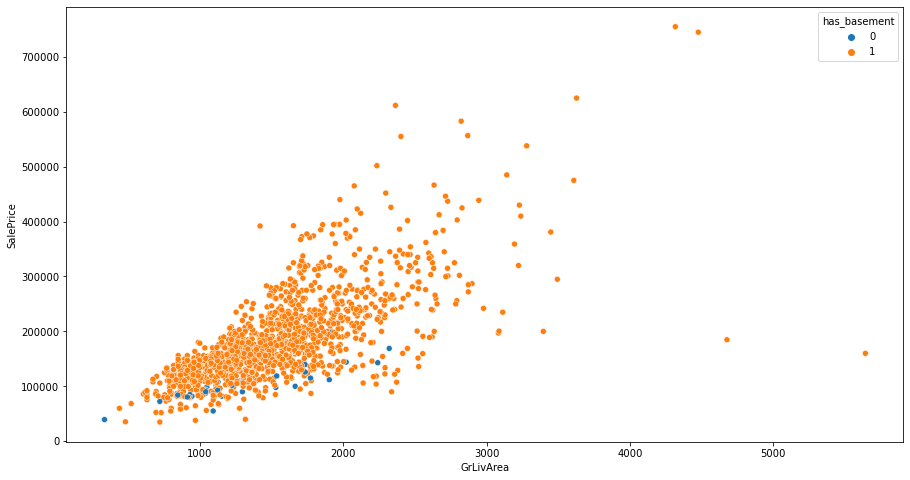

In [42]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="has_basement", data=clean_data)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

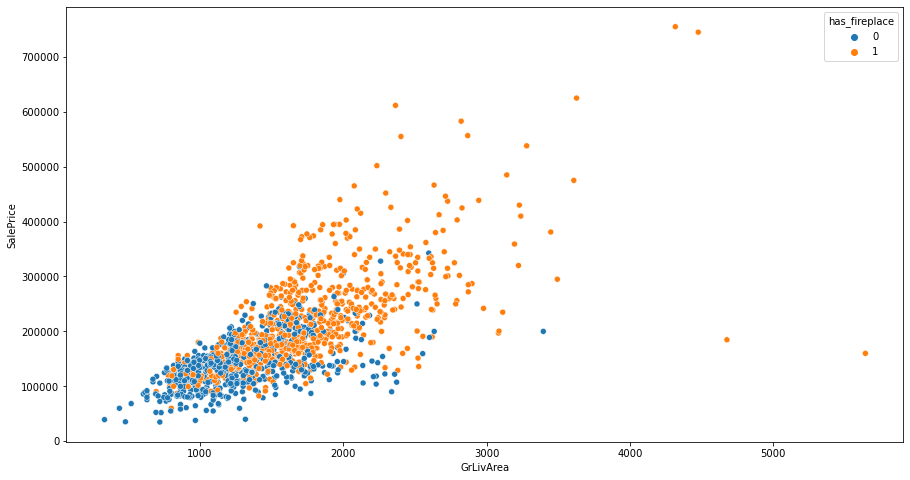

In [43]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="has_fireplace", data=clean_data)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

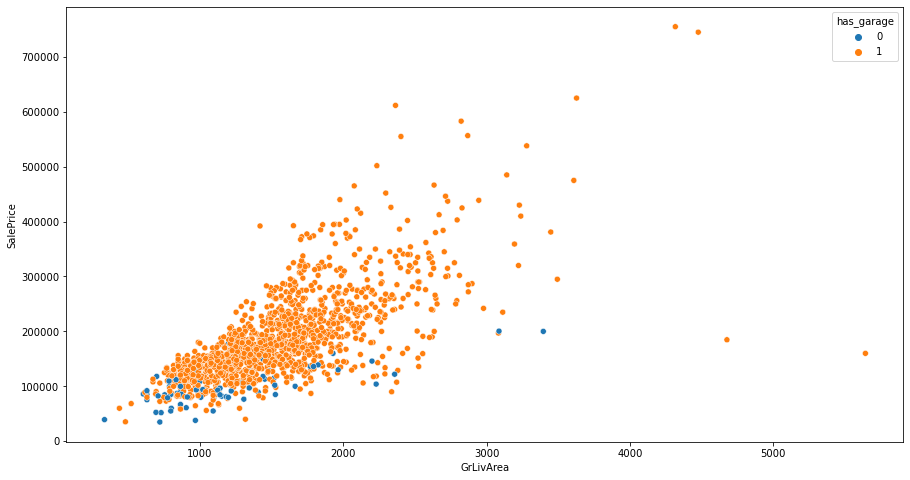

In [44]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="has_garage", data=clean_data)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

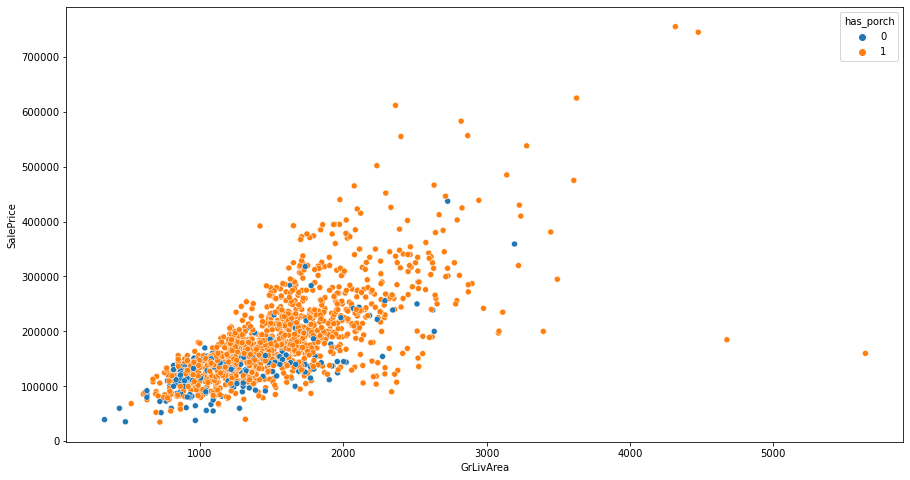

In [45]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="has_porch", data=clean_data)

In [46]:
del clean_data['has_porch']

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

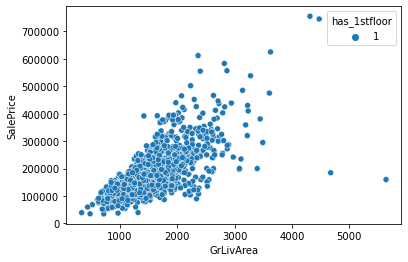

In [47]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="has_1stfloor", data=clean_data)

In [48]:
del clean_data['has_1stfloor']

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

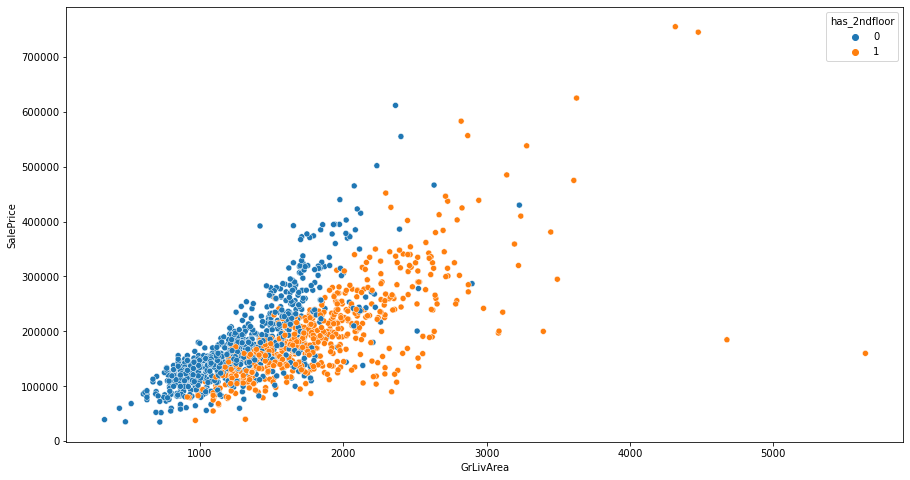

In [49]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="has_2ndfloor", data=clean_data)

#### NOMINAL FEATURES

In [50]:
clean_data[nominal].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       2919 non-null   object
 1   Street         2919 non-null   object
 2   Alley          2919 non-null   object
 3   LotConfig      2919 non-null   object
 4   Neighborhood   2919 non-null   object
 5   Condition1     2919 non-null   object
 6   Condition2     2919 non-null   object
 7   BldgType       2919 non-null   object
 8   HouseStyle     2919 non-null   object
 9   RoofStyle      2919 non-null   object
 10  RoofMatl       2919 non-null   object
 11  Exterior1st    2919 non-null   object
 12  Exterior2nd    2919 non-null   object
 13  MasVnrType     2919 non-null   object
 14  Foundation     2919 non-null   object
 15  Heating        2919 non-null   object
 16  CentralAir     2919 non-null   object
 17  Electrical     2919 non-null   object
 18  GarageType     2919 non-null

##### Neighborhood

<AxesSubplot:xlabel='SalePrice', ylabel='Neighborhood'>

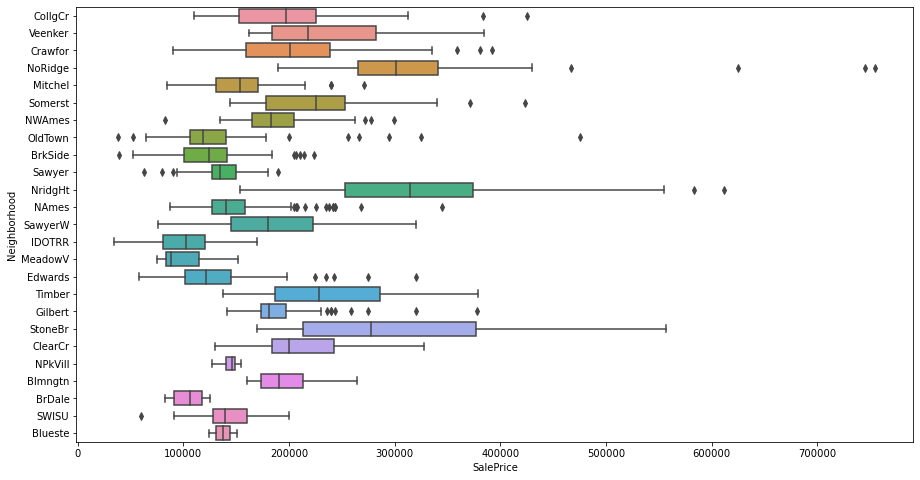

In [51]:
plt.figure(figsize=(15,8))
sns.boxplot(x="SalePrice", y="Neighborhood", data=clean_data)

In [52]:
clean_data.groupby(['Neighborhood'])['Id'].count()

Neighborhood
Blmngtn     28
Blueste     10
BrDale      30
BrkSide    108
ClearCr     44
CollgCr    267
Crawfor    103
Edwards    194
Gilbert    165
IDOTRR      93
MeadowV     37
Mitchel    114
NAmes      443
NPkVill     23
NWAmes     131
NoRidge     71
NridgHt    166
OldTown    239
SWISU       48
Sawyer     151
SawyerW    125
Somerst    182
StoneBr     51
Timber      72
Veenker     24
Name: Id, dtype: int64

In [53]:
clean_data = pd.get_dummies(clean_data, columns=['Neighborhood'], prefix="hood")

In [54]:
clean_data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchArea,LotArea (box-cox),1stFlrSF (box-cox),GrLivArea (box-cox),TotalSF (box-cox),SalePrice (box-cox),has_basement,has_fireplace,has_garage,has_2ndfloor,AgeHouse,AgeRemod,hood_Blmngtn,hood_Blueste,hood_BrDale,hood_BrkSide,hood_ClearCr,hood_CollgCr,hood_Crawfor,hood_Edwards,hood_Gilbert,hood_IDOTRR,hood_MeadowV,hood_Mitchel,hood_NAmes,hood_NPkVill,hood_NWAmes,hood_NoRidge,hood_NridgHt,hood_OldTown,hood_SWISU,hood_Sawyer,hood_SawyerW,hood_Somerst,hood_StoneBr,hood_Timber,hood_Veenker
0,1,60,RL,8450,Pave,NotA,3,3,Inside,0,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2,4,PConc,2,4,3,2,706.0,6,0.0,150.0,856.0,GasA,0,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,...,61,0,0,0,0,3,4,NotA,0,WD,Normal,208500.0,2566.0,61,17.233406,6.752270,7.444249,24.274473,12.247694,1,0,1,1,5,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,9600,Pave,NotA,3,3,FR2,0,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,4,CBlock,2,4,1,0,978.0,6,0.0,284.0,1262.0,GasA,0,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,...,0,0,0,0,0,3,4,NotA,0,WD,Normal,181500.0,2524.0,298,17.650449,7.140453,7.140453,24.158678,12.109011,1,1,1,0,31,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,60,RL,11250,Pave,NotA,0,3,Inside,0,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2,4,PConc,2,4,2,2,486.0,6,0.0,434.0,920.0,GasA,0,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,...,42,0,0,0,0,3,4,NotA,0,WD,Normal,223500.0,2706.0,42,18.178584,6.824374,7.487734,24.650449,12.317167,1,1,1,1,7,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,9550,Pave,NotA,0,3,Corner,0,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,4,BrkTil,4,1,3,0,216.0,6,0.0,540.0,756.0,GasA,2,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,...,35,272,0,0,0,3,4,NotA,0,WD,Abnorml,140000.0,2473.0,307,17.633246,6.867974,7.448334,24.016107,11.849398,1,1,1,1,91,36,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,14260,Pave,NotA,0,3,FR2,0,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2,4,PConc,2,4,0,2,655.0,6,0.0,490.0,1145.0,GasA,0,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,...,84,0,0,0,0,3,4,NotA,0,WD,Normal,250000.0,3343.0,276,18.988661,7.043160,7.695303,26.196741,12.429216,1,1,1,1,8,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


##### MSZoning

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

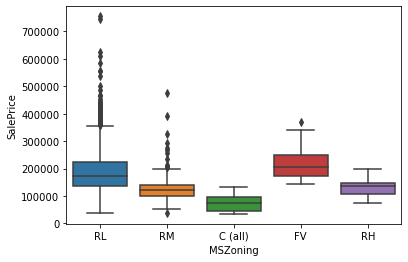

In [55]:
sns.boxplot(x="MSZoning", y="SalePrice", data=clean_data)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

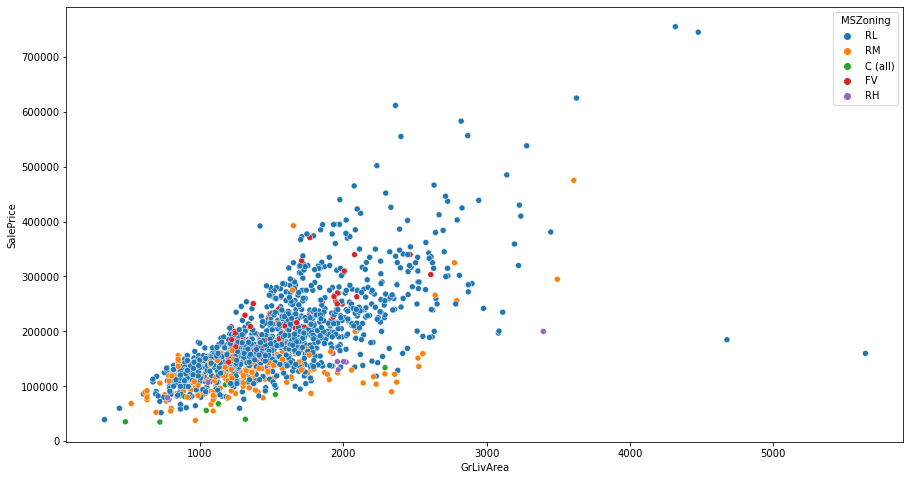

In [56]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="MSZoning", data=clean_data)

In [57]:
del clean_data['MSZoning']

##### Street

In [58]:
clean_data.groupby(['Street'])['Id'].count()

Street
Grvl      12
Pave    2907
Name: Id, dtype: int64

In [59]:
del clean_data['Street']

##### Alley

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

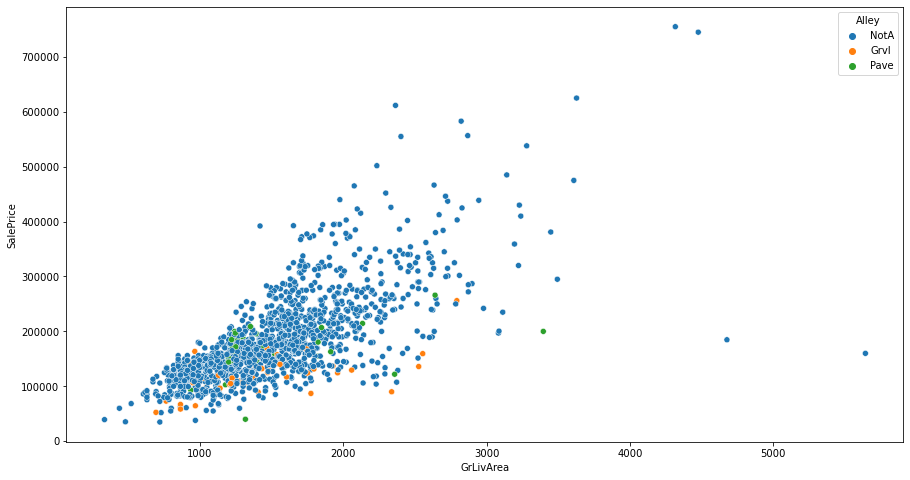

In [60]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="Alley", data=clean_data)

In [61]:
del clean_data['Alley']

##### LotConfig

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

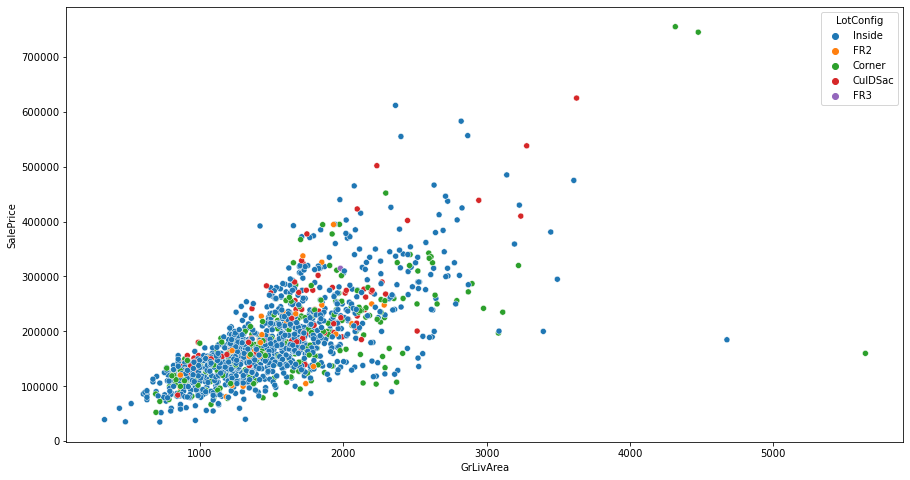

In [62]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="LotConfig", data=clean_data)

In [63]:
del clean_data['LotConfig']

##### Condition 1 & Condition 2

Both conditions have the same possible values.

    Artery	Adjacent to arterial street
    Feedr	Adjacent to feeder street	
    Norm	Normal	
    RRNn	Within 200' of North-South Railroad
    RRAn	Adjacent to North-South Railroad
    PosN	Near positive off-site feature--park, greenbelt, etc.
    PosA	Adjacent to postive off-site feature
    RRNe	Within 200' of East-West Railroad
    RRAe	Adjacent to East-West Railroad

<AxesSubplot:xlabel='SalePrice', ylabel='Condition1'>

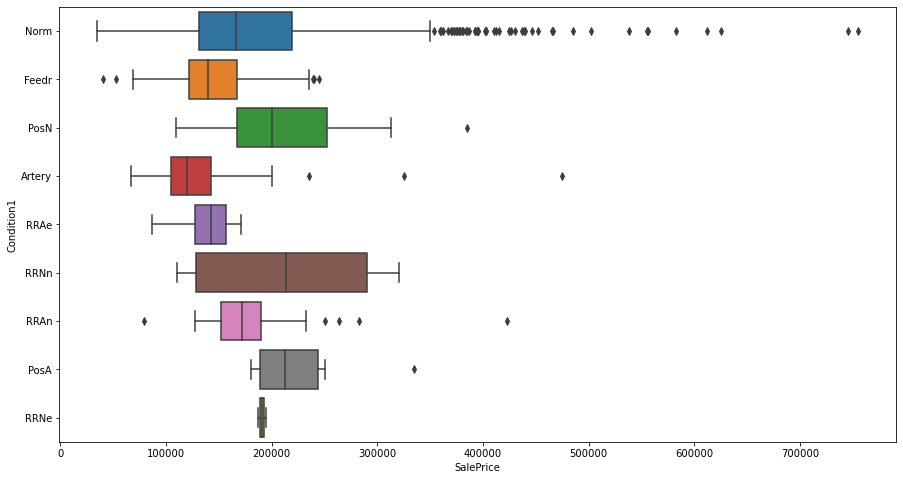

In [64]:
plt.figure(figsize=(15,8))
sns.boxplot(x="SalePrice", y="Condition1", data=clean_data)

<AxesSubplot:xlabel='SalePrice', ylabel='Condition2'>

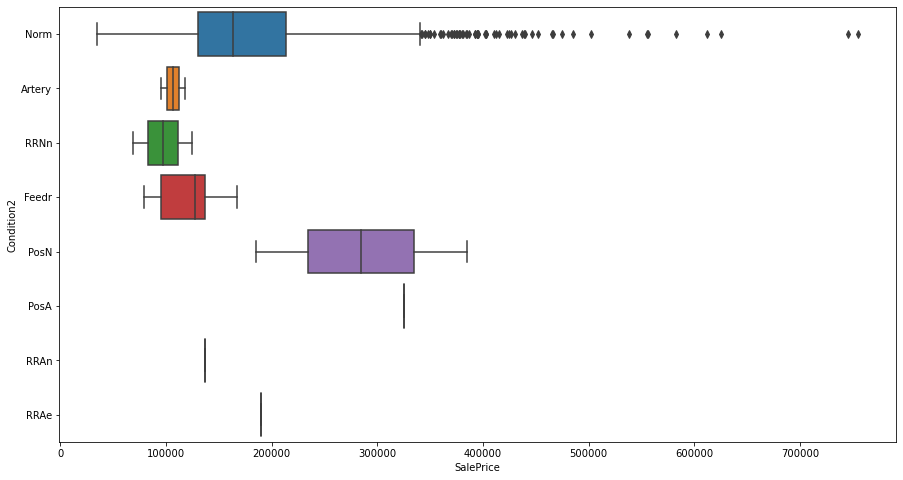

In [65]:
plt.figure(figsize=(15,8))
sns.boxplot(x="SalePrice", y="Condition2", data=clean_data)

In [66]:
clean_data['park'] = clean_data.apply(lambda row: 1 if row.Condition1 == 'PosA' or row.Condition1 == 'PosN' or row.Condition2 == 'PosA' or row.Condition2 == 'PosN' else 0, axis=1)
clean_data['street'] = clean_data.apply(lambda row: 1 if row.Condition1 == 'Artery' or row.Condition1 == 'Feedr' or row.Condition2 == 'Artery' or row.Condition2 == 'Feedr' else 0, axis=1)

In [67]:
clean_data.head()

,Id,MSSubClass,LotArea,LotShape,LandContour,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchArea,LotArea (box-cox),1stFlrSF (box-cox),GrLivArea (box-cox),TotalSF (box-cox),SalePrice (box-cox),has_basement,has_fireplace,has_garage,has_2ndfloor,AgeHouse,AgeRemod,hood_Blmngtn,hood_Blueste,hood_BrDale,hood_BrkSide,hood_ClearCr,hood_CollgCr,hood_Crawfor,hood_Edwards,hood_Gilbert,hood_IDOTRR,hood_MeadowV,hood_Mitchel,hood_NAmes,hood_NPkVill,hood_NWAmes,hood_NoRidge,hood_NridgHt,hood_OldTown,hood_SWISU,hood_Sawyer,hood_SawyerW,hood_Somerst,hood_StoneBr,hood_Timber,hood_Veenker,park,street
0,1,60,8450,3,3,0,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2,4,PConc,2,4,3,2,706.0,6,0.0,150.0,856.0,GasA,0,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,3,Attchd,...,0,0,0,3,4,NotA,0,WD,Normal,208500.0,2566.0,61,17.233406,6.752270,7.444249,24.274473,12.247694,1,0,1,1,5,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,20,9600,3,3,0,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,4,CBlock,2,4,1,0,978.0,6,0.0,284.0,1262.0,GasA,0,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,5,Attchd,...,0,0,0,3,4,NotA,0,WD,Normal,181500.0,2524.0,298,17.650449,7.140453,7.140453,24.158678,12.109011,1,1,1,0,31,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,3,60,11250,0,3,0,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2,4,PConc,2,4,2,2,486.0,6,0.0,434.0,920.0,GasA,0,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,5,Attchd,...,0,0,0,3,4,NotA,0,WD,Normal,223500.0,2706.0,42,18.178584,6.824374,7.487734,24.650449,12.317167,1,1,1,1,7,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,70,9550,0,3,0,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,4,BrkTil,4,1,3,0,216.0,6,0.0,540.0,756.0,GasA,2,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,Detchd,...,0,0,0,3,4,NotA,0,WD,Abnorml,140000.0,2473.0,307,17.633246,6.867974,7.448334,24.016107,11.849398,1,1,1,1,91,36,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,60,14260,0,3,0,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2,4,PConc,2,4,0,2,655.0,6,0.0,490.0,1145.0,GasA,0,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,5,Attchd,...,0,0,0,3,4,NotA,0,WD,Normal,250000.0,3343.0,276,18.988661,7.043160,7.695303,26.196741,12.429216,1,1,1,1,8,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [68]:
del clean_data['Condition1']
del clean_data['Condition2']

##### BldgType

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

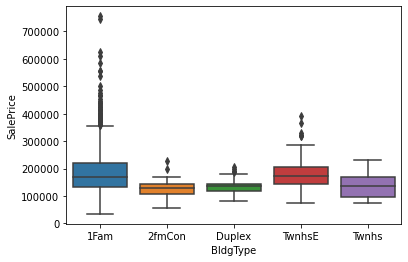

In [69]:
sns.boxplot(x="BldgType", y="SalePrice", data=clean_data)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

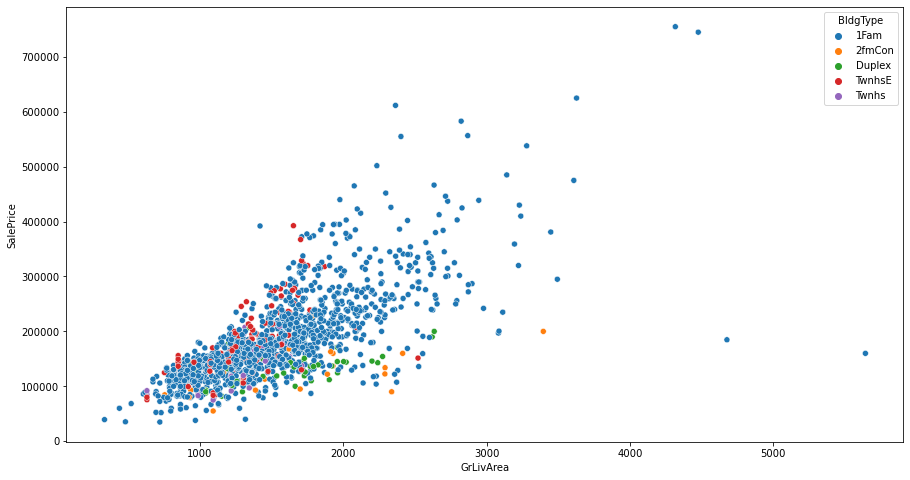

In [70]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="BldgType", data=clean_data)

In [71]:
clean_data['townHouse'] = clean_data.apply(lambda row: 1 if row.BldgType == 'Twnhs' or row.BldgType == 'TwnhsE' else 0, axis = 1)
clean_data['multi_family_home'] = clean_data.apply(lambda row: 1 if row.BldgType == '2fmCon' or row.BldgType == 'Duplex' else 0, axis = 1)

In [72]:
del clean_data['BldgType']

##### HouseStyle

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

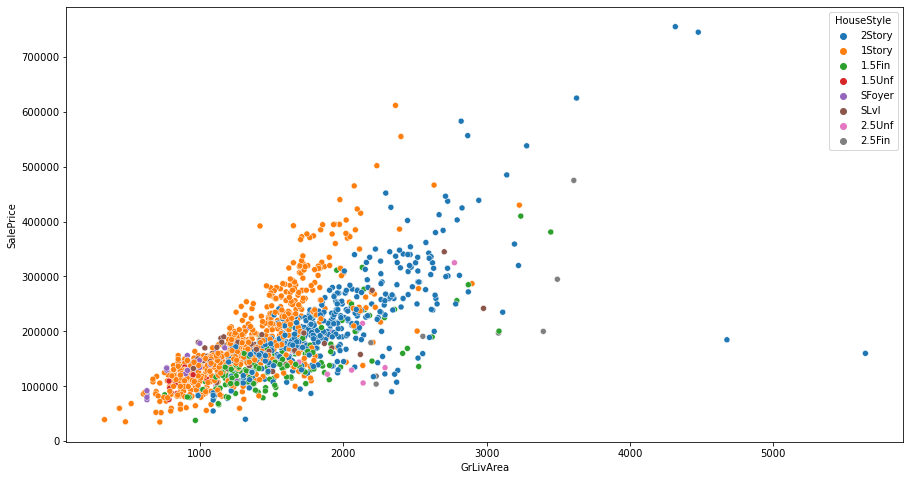

In [73]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="HouseStyle", data=clean_data)

This feature actually looks a lot like the has second floor feature that was created earlier. As becomes obvious from this plot. People prefer the living area to be split over the ground and first floor. Is it split over a third floor, the house becomes cheaper. 

In [74]:
del clean_data['HouseStyle']

##### RoofStyle

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

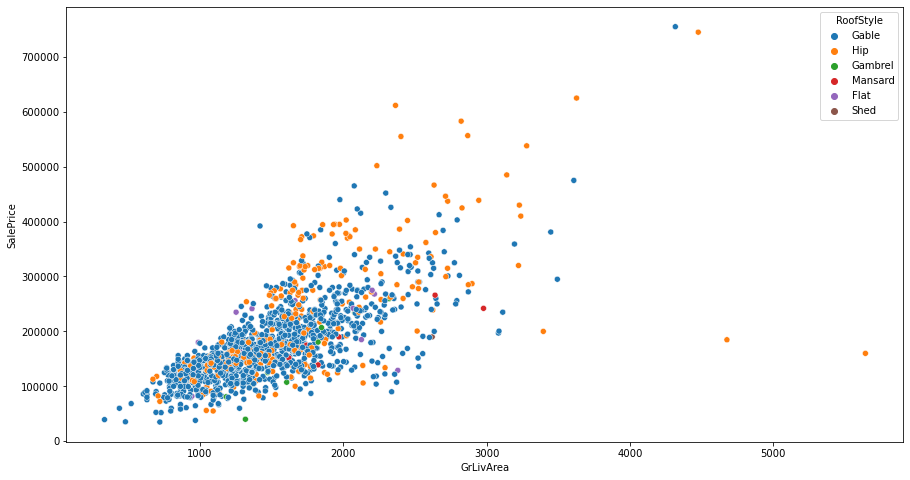

In [75]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="RoofStyle", data=clean_data)

In [76]:
del clean_data['RoofStyle']

##### RoofMatl

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

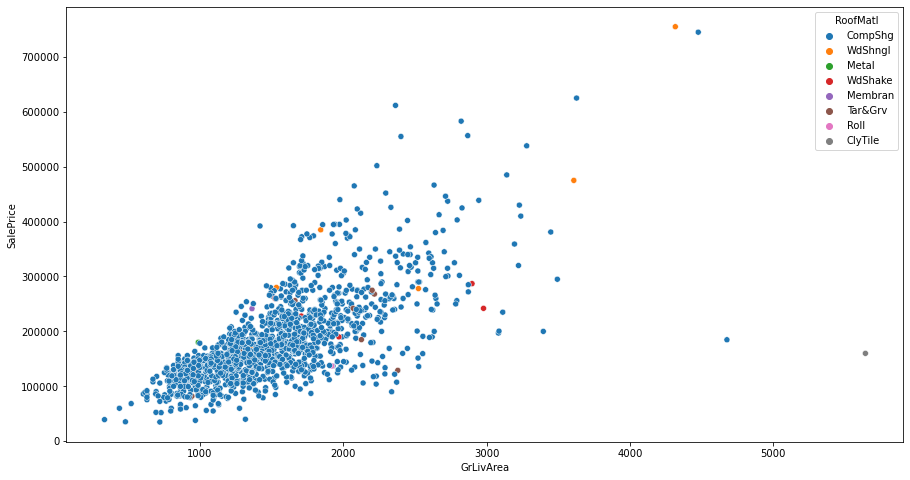

In [77]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="RoofMatl", data=clean_data)

In [78]:
del clean_data['RoofMatl']

##### Exterior: Exterior1st & Exterior2nd & ExterCond & ExterQual

Both the 1st and 2nd Exterior  have the same features. 

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

<AxesSubplot:xlabel='SalePrice', ylabel='Exterior1st'>

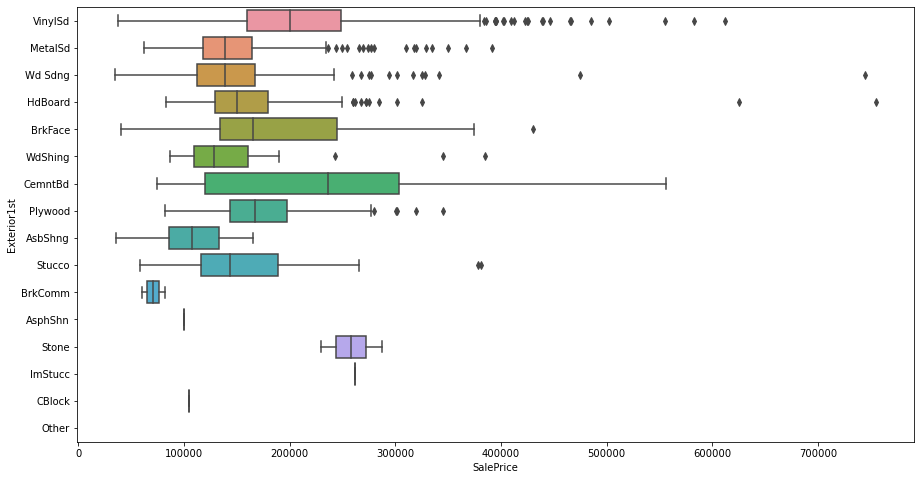

In [79]:
plt.figure(figsize=(15,8))
sns.boxplot(x="SalePrice", y="Exterior1st", data=clean_data)

<AxesSubplot:xlabel='SalePrice', ylabel='Exterior2nd'>

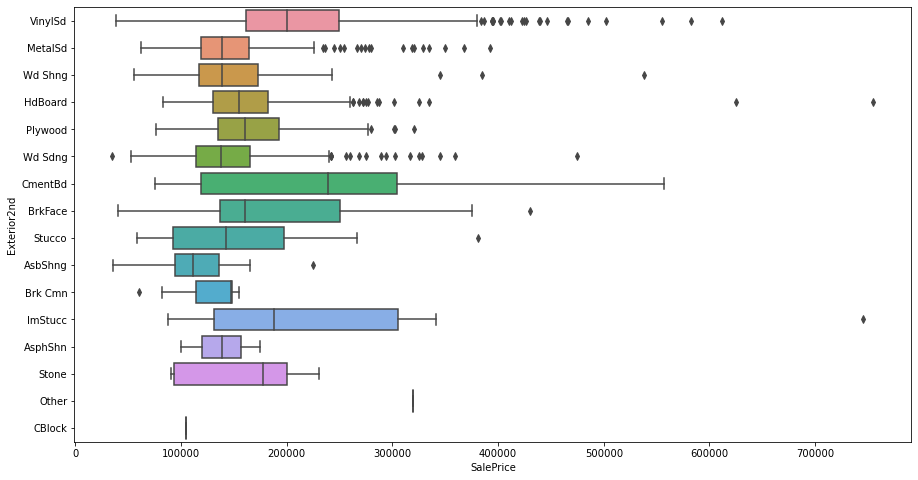

In [80]:
plt.figure(figsize=(15,8))
sns.boxplot(x="SalePrice", y="Exterior2nd", data=clean_data)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

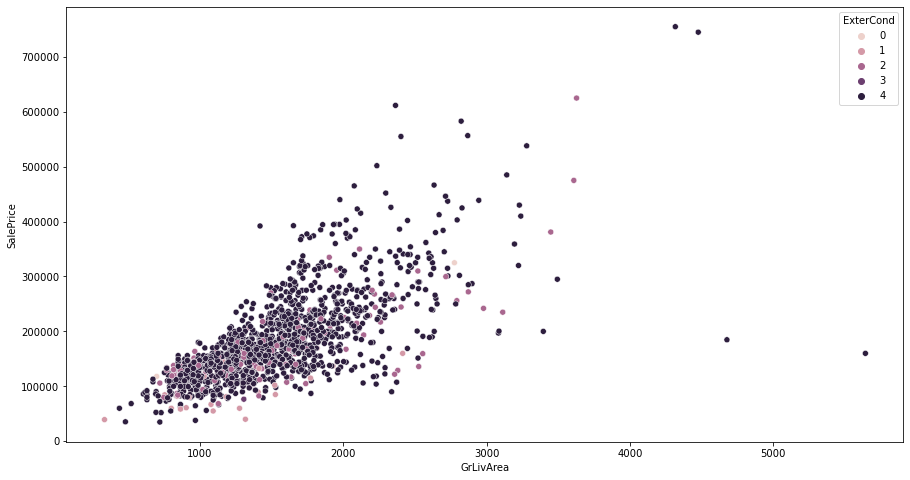

In [81]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="ExterCond", data=clean_data)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

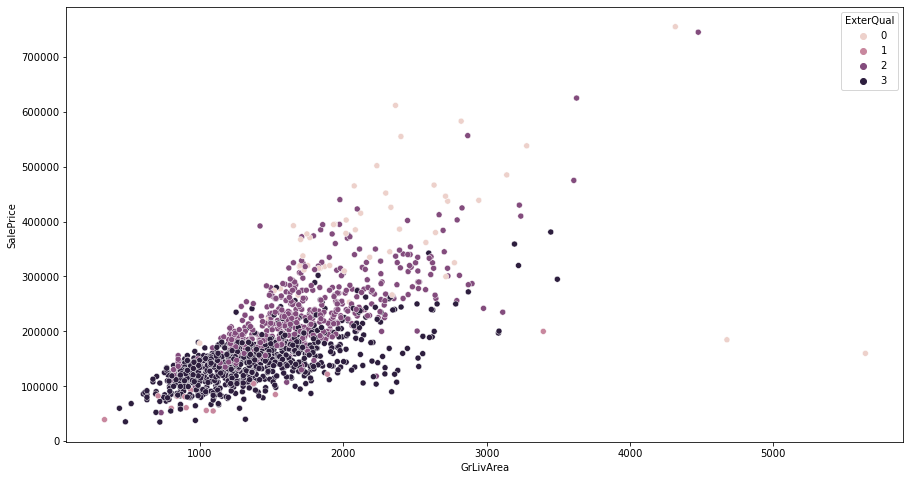

In [82]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="ExterQual", data=clean_data)

In [83]:
del clean_data['Exterior1st']
del clean_data['Exterior2nd']
del clean_data['ExterCond']

##### MasVnrType

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

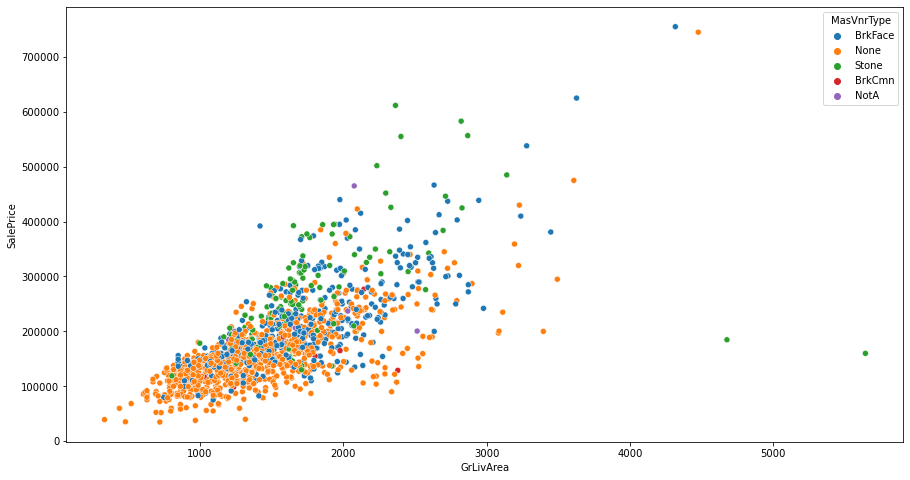

In [84]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="MasVnrType", data=clean_data)

In [85]:
del clean_data['MasVnrType']

##### Foundation

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

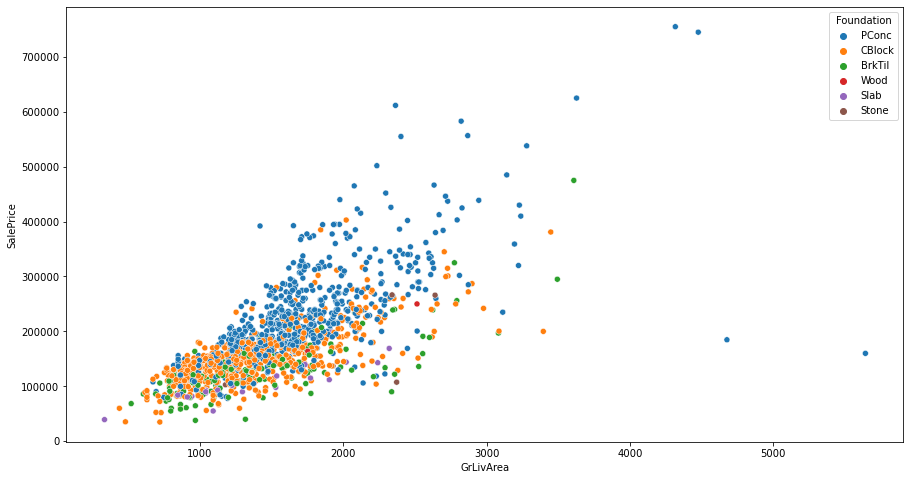

In [86]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="Foundation", data=clean_data)

In [87]:
clean_data['PConc'] = clean_data.apply(lambda row: 1 if row.Foundation == "PConc" else 0, axis = 1)
clean_data['CBlock'] = clean_data.apply(lambda row: 1 if row.Foundation == "CBlock" else 0, axis = 1)
clean_data['BrkTil'] = clean_data.apply(lambda row: 1 if row.Foundation == "BrkTil" else 0, axis = 1)

In [88]:
del clean_data['Foundation']

##### Heating

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

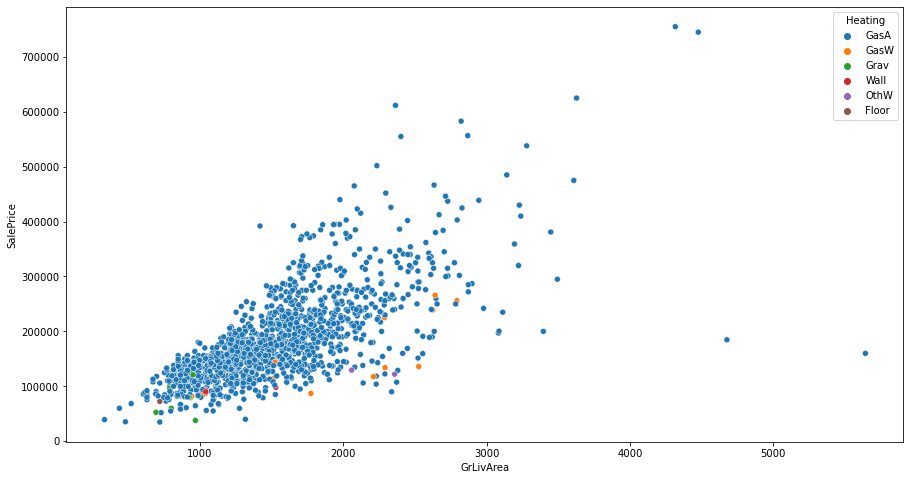

In [89]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="Heating", data=clean_data)

In [90]:
del clean_data['Heating']

##### CentralAir

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

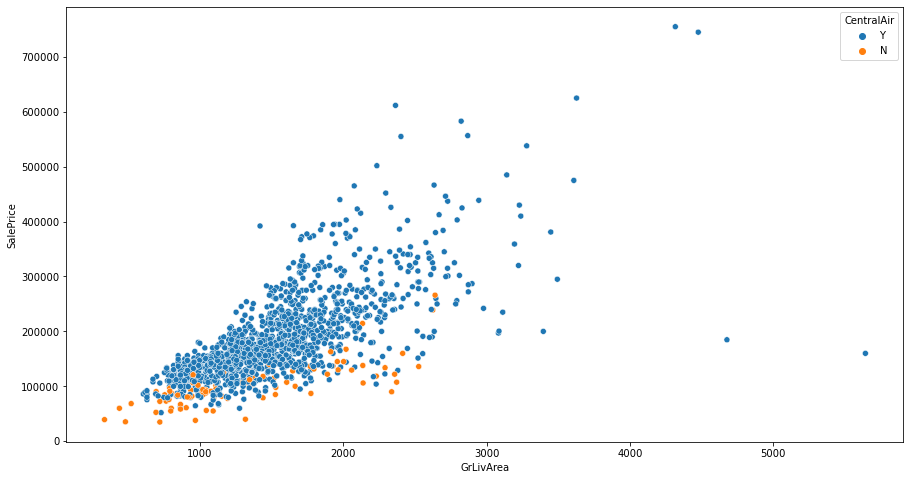

In [91]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="CentralAir", data=clean_data)

In [92]:
clean_data['CentralAir'] = clean_data.apply(lambda row: 1 if row.CentralAir == 'Y' else 0, axis = 1)

##### Electrical

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

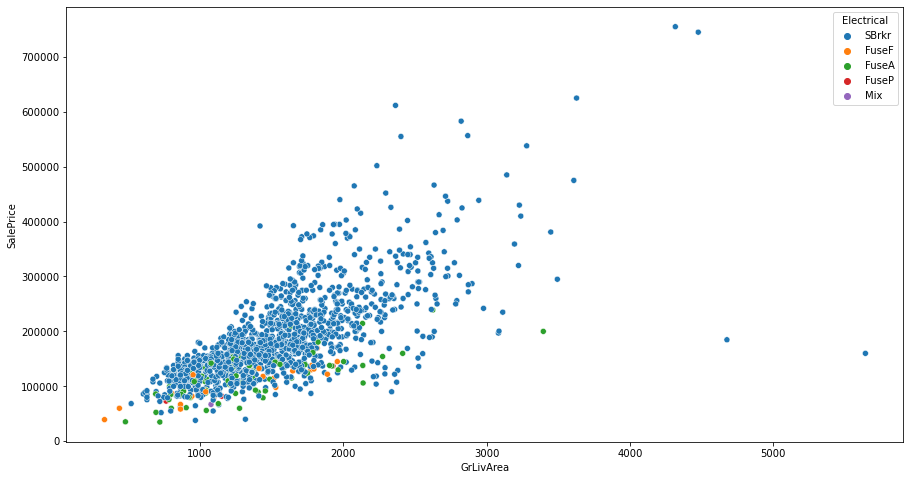

In [93]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="Electrical", data=clean_data)

In [94]:
clean_data['Electrical'] = clean_data.apply(lambda row: 1 if row.Electrical == 'SBrkr' else 0, axis = 1)

##### GarageType

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

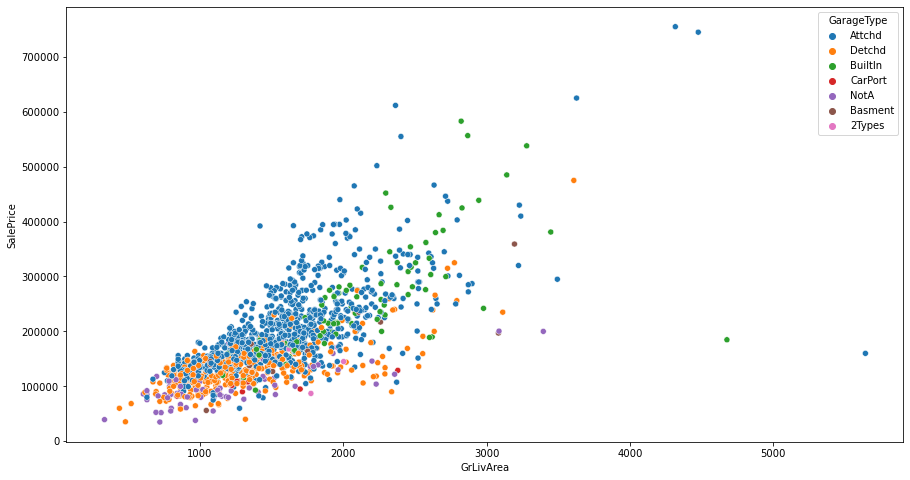

In [95]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="GarageType", data=clean_data)

In [96]:
clean_data['GarageType'] = clean_data.apply(lambda row: 0 if row.GarageType == 'Attchd' else(0 if row.GarageType == 'BuiltIn' else 1), axis = 1)

##### PavedDrive

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

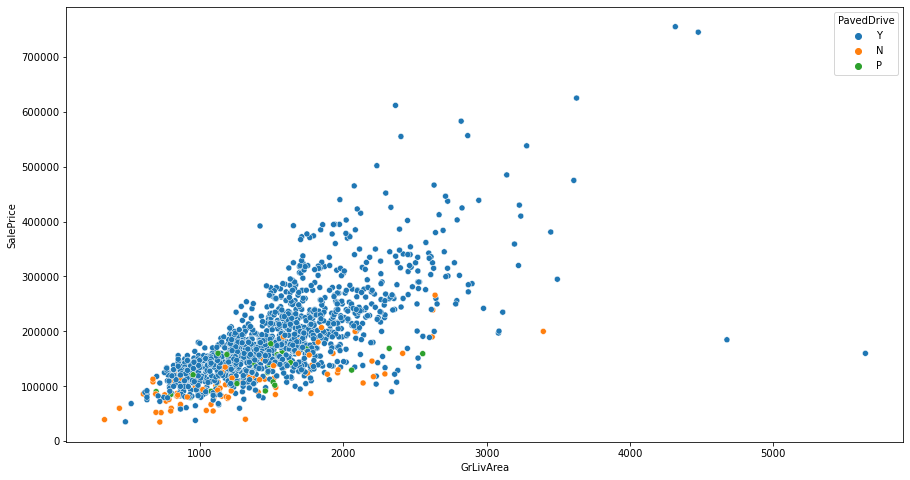

In [97]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="PavedDrive", data=clean_data)

In [98]:
clean_data['PavedDrive'] = clean_data.apply(lambda row: 1 if row.PavedDrive == 'Y' else 0, axis = 1)

##### MiscFeature

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

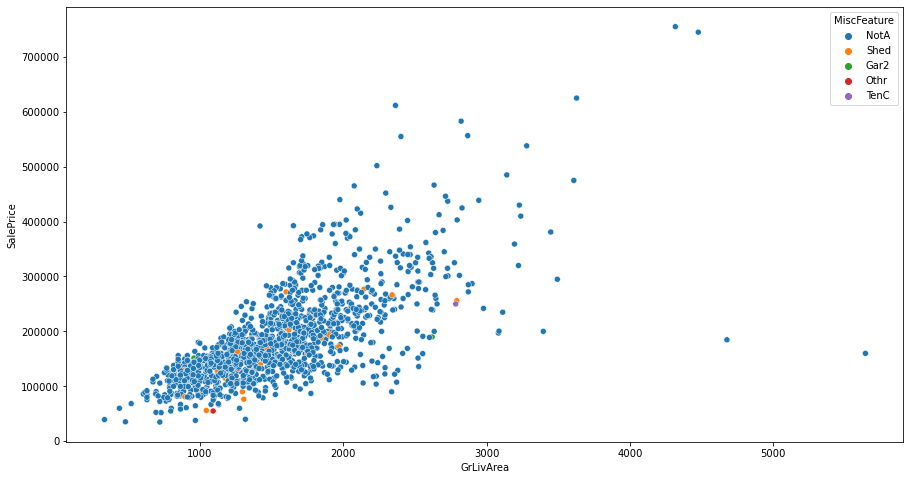

In [99]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="MiscFeature", data=clean_data)

In [100]:
del clean_data['MiscFeature']

##### SaleType & SaleCondition

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

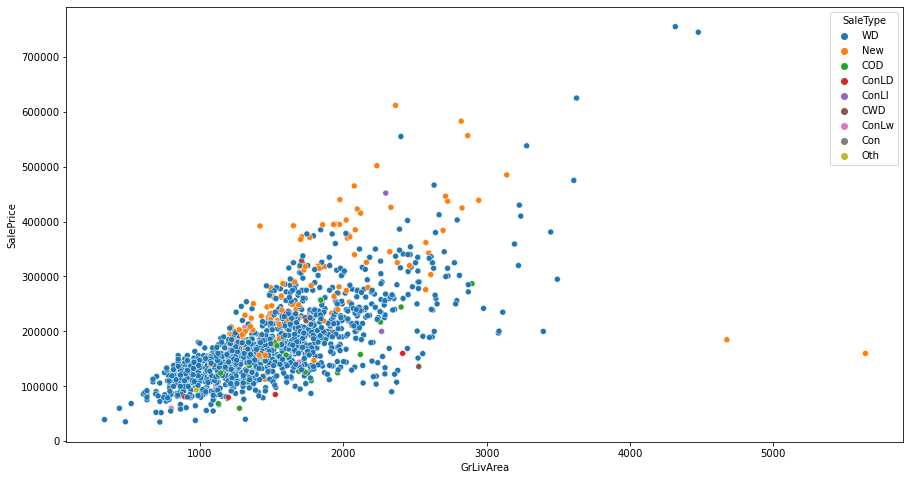

In [101]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="SaleType", data=clean_data)

In [102]:
clean_data['SaleTypeNew'] = clean_data.apply(lambda row: 1 if row.SaleType == 'New' else 0, axis = 1)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

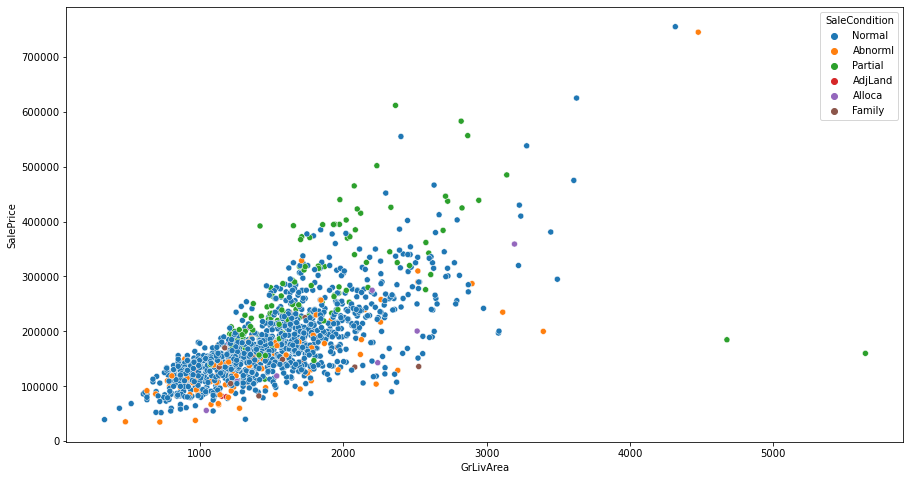

In [103]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="SaleCondition", data=clean_data)

In [104]:
clean_data['SaleCondPartial'] = clean_data.apply(lambda row: 1 if row.SaleCondition == 'Partial' else 0, axis = 1)
clean_data['SaleCondAbnormal'] = clean_data.apply(lambda row: 1 if row.SaleCondition == 'Abnormal' else 0, axis = 1)

In [105]:
del clean_data['SaleType']
del clean_data['SaleCondition']

In [106]:
clean_data.head()

,Id,MSSubClass,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,...,MiscVal,SalePrice,TotalSF,TotalPorchArea,LotArea (box-cox),1stFlrSF (box-cox),GrLivArea (box-cox),TotalSF (box-cox),SalePrice (box-cox),has_basement,has_fireplace,has_garage,has_2ndfloor,AgeHouse,AgeRemod,hood_Blmngtn,hood_Blueste,hood_BrDale,hood_BrkSide,hood_ClearCr,hood_CollgCr,hood_Crawfor,hood_Edwards,hood_Gilbert,hood_IDOTRR,hood_MeadowV,hood_Mitchel,hood_NAmes,hood_NPkVill,hood_NWAmes,hood_NoRidge,hood_NridgHt,hood_OldTown,hood_SWISU,hood_Sawyer,hood_SawyerW,hood_Somerst,hood_StoneBr,hood_Timber,hood_Veenker,park,street,townHouse,multi_family_home,PConc,CBlock,BrkTil,SaleTypeNew,SaleCondPartial,SaleCondAbnormal
0,1,60,8450,3,3,0,7,5,196.0,2,2,4,3,2,706.0,6,0.0,150.0,856.0,0,1,1,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,3,0,2,2.0,548.0,5,5,1,0,61,0,0,0,0,...,0,208500.0,2566.0,61,17.233406,6.752270,7.444249,24.274473,12.247694,1,0,1,1,5,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,20,9600,3,3,0,6,8,0.0,3,2,4,1,0,978.0,6,0.0,284.0,1262.0,0,1,1,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,5,0,2,2.0,460.0,5,5,1,298,0,0,0,0,0,...,0,181500.0,2524.0,298,17.650449,7.140453,7.140453,24.158678,12.109011,1,1,1,0,31,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
2,3,60,11250,0,3,0,7,5,162.0,2,2,4,2,2,486.0,6,0.0,434.0,920.0,0,1,1,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,5,0,2,2.0,608.0,5,5,1,0,42,0,0,0,0,...,0,223500.0,2706.0,42,18.178584,6.824374,7.487734,24.650449,12.317167,1,1,1,1,7,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,70,9550,0,3,0,7,5,0.0,3,4,1,3,0,216.0,6,0.0,540.0,756.0,2,1,1,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,1,3,3.0,642.0,5,5,1,0,35,272,0,0,0,...,0,140000.0,2473.0,307,17.633246,6.867974,7.448334,24.016107,11.849398,1,1,1,1,91,36,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,60,14260,0,3,0,8,5,350.0,2,2,4,0,2,655.0,6,0.0,490.0,1145.0,0,1,1,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,5,0,2,3.0,836.0,5,5,1,192,84,0,0,0,0,...,0,250000.0,3343.0,276,18.988661,7.043160,7.695303,26.196741,12.429216,1,1,1,1,8,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Outliers

In [112]:
print(strongly_correlated_SalePriceBC)
strongly_correlated_SalePriceBC.remove('YearBuilt')
strongly_correlated_SalePriceBC.append('AgeHouse')

['GrLivArea', 'GarageArea', 'TotalSF', 'GrLivArea (box-cox)', 'TotalSF (box-cox)', 'OverallQual', 'YearBuilt', 'GarageCars']


In [114]:
from sklearn.ensemble import IsolationForest

strongly_correlated = clean_data[strongly_correlated_SalePriceBC]
#df_encoded = encode_ordinals(df[list(set(strongly_correlated) & set(df.columns))])
iso = IsolationForest(n_estimators=100, bootstrap=True, contamination=0.005)
outliers = pd.DataFrame(
    iso.fit_predict(strongly_correlated), columns=["outlier"], index=clean_data.index
)
outliers["outlier"] = outliers["outlier"].apply(lambda x: 1 if x < 0 else 0)
df = pd.concat([clean_data, outliers], axis=1)

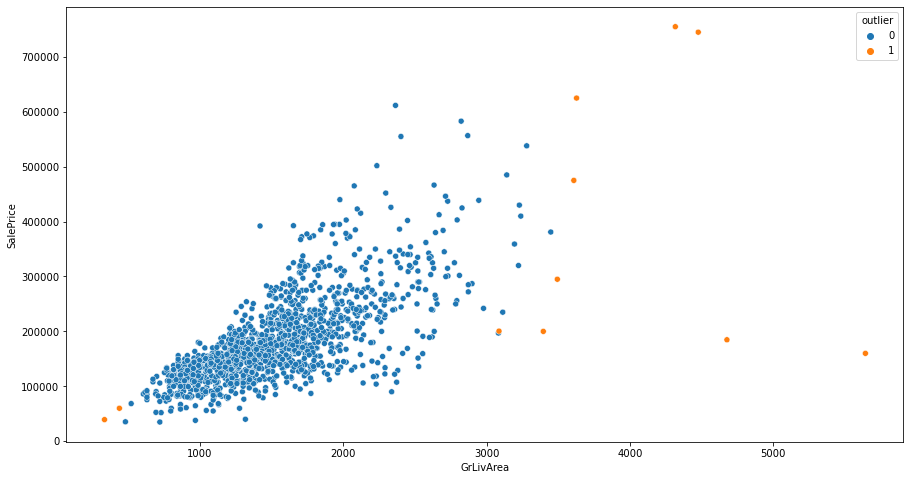

In [116]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="outlier", data=df)

In [119]:
df.loc[(df['outlier']== 1)]

,Id,MSSubClass,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,...,SalePrice,TotalSF,TotalPorchArea,LotArea (box-cox),1stFlrSF (box-cox),GrLivArea (box-cox),TotalSF (box-cox),SalePrice (box-cox),has_basement,has_fireplace,has_garage,has_2ndfloor,AgeHouse,AgeRemod,hood_Blmngtn,hood_Blueste,hood_BrDale,hood_BrkSide,hood_ClearCr,hood_CollgCr,hood_Crawfor,hood_Edwards,hood_Gilbert,hood_IDOTRR,hood_MeadowV,hood_Mitchel,hood_NAmes,hood_NPkVill,hood_NWAmes,hood_NoRidge,hood_NridgHt,hood_OldTown,hood_SWISU,hood_Sawyer,hood_SawyerW,hood_Somerst,hood_StoneBr,hood_Timber,hood_Veenker,park,street,townHouse,multi_family_home,PConc,CBlock,BrkTil,SaleTypeNew,SaleCondPartial,SaleCondAbnormal,outlier
185,186,75,22950,1,3,0,10,9,0.0,2,4,4,2,6,0.0,6,0.0,1107.0,1107.0,0,1,1,1518,1518,572,3608,0.0,0.0,2,1,4,1,0,12,6,2,5,1,3,3.0,840.0,0,5,1,0,260,0,0,410,0,...,475000.0,4715.0,670,20.691912,7.325149,8.190909,28.892237,13.071070,1,1,1,1,114,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
304,305,75,18386,3,3,0,7,9,0.0,3,4,4,3,6,0.0,6,0.0,1470.0,1470.0,0,1,1,1675,1818,0,3493,0.0,0.0,3,0,3,1,2,10,6,1,0,0,3,3.0,870.0,5,5,1,302,0,0,0,0,0,...,295000.0,4963.0,302,19.885152,7.423568,8.158516,29.314138,12.594731,1,1,1,1,128,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
523,524,60,40094,0,0,0,10,5,762.0,0,0,4,1,2,2260.0,6,0.0,878.0,3138.0,0,1,1,3138,1538,0,4676,1.0,0.0,3,1,3,1,0,11,6,1,2,0,0,3.0,884.0,5,5,1,208,406,0,0,0,0,...,184750.0,7814.0,614,22.827835,8.051341,8.450198,33.293986,12.126759,1,1,1,1,0,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1
533,534,20,5000,3,2,1,1,3,0.0,1,3,2,4,4,0.0,4,0.0,0.0,0.0,1,0,0,334,0,0,334,0.0,0.0,1,0,1,1,1,2,6,0,3,1,1,0.0,0.0,3,3,0,0,0,0,0,0,0,...,39300.0,334.0,0,15.589290,5.811141,5.811141,13.027135,10.578980,0,0,0,0,61,57,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
635,636,190,10896,3,0,0,6,7,0.0,1,4,0,3,3,256.0,6,0.0,1184.0,1440.0,0,1,0,1440,1440,515,3395,0.0,0.0,2,0,8,2,1,14,6,0,3,1,1,0.0,0.0,3,3,0,0,110,0,0,0,0,...,200000.0,4835.0,110,18.071241,7.272398,8.130059,29.098413,12.206073,1,0,0,1,93,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1
691,692,60,21535,0,3,0,10,6,1170.0,0,0,4,1,2,1455.0,6,0.0,989.0,2444.0,0,1,1,2444,1872,0,4316,0.0,1.0,3,1,4,1,0,10,6,2,0,0,0,3.0,832.0,5,5,1,382,50,0,0,0,0,...,755000.0,6760.0,432,20.457978,7.801391,8.370084,31.974470,13.534473,1,1,1,1,13,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1100,1101,30,8400,3,0,0,2,5,0.0,3,4,0,3,5,290.0,6,0.0,0.0,290.0,4,0,0,438,0,0,438,0.0,0.0,1,0,1,1,1,3,6,0,3,1,3,1.0,246.0,5,5,0,0,0,0,0,0,0,...,60000.0,728.0,0,17.214177,6.082219,6.082219,16.669192,11.002100,1,0,1,0,89,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1169,1170,60,35760,0,3,0,10,5,1378.0,2,0,4,1,2,1387.0,6,0.0,543.0,1930.0,0,1,1,1831,1796,0,3627,1.0,0.0,3,1,4,1,2,10,6,1,5,0,0,3.0,807.0,5,5,1,361,76,0,0,0,0,...,625000.0,5557.0,437,22.377152,7.512618,8.196161,30.263777,13.345507,1,1,1,1,11,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1173,1174,50,18030,0,0,0,5,6,0.0,3,4,4,3,5,152.0,1,469.0,977.0,1598.0,4,1,1,1636,971,479,3086,0.0,0.0,3,0,3,1,0,12,0,1,2,1,1,0.0,0.0,3,3,1,122,0,0,0,0,0,...,200500.0,4684.0,122,19.815120,7.400010,8.034631,28.838335,12.208570,1,1,0,1,61,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1182,1183,60,15623,0,3,0,10,5,0.0,2,0,4,0,2,2096.0,6,0.0,

## Save the Data

In [120]:
df.shape

(2919, 103)

In [121]:
df.head()

,Id,MSSubClass,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,...,SalePrice,TotalSF,TotalPorchArea,LotArea (box-cox),1stFlrSF (box-cox),GrLivArea (box-cox),TotalSF (box-cox),SalePrice (box-cox),has_basement,has_fireplace,has_garage,has_2ndfloor,AgeHouse,AgeRemod,hood_Blmngtn,hood_Blueste,hood_BrDale,hood_BrkSide,hood_ClearCr,hood_CollgCr,hood_Crawfor,hood_Edwards,hood_Gilbert,hood_IDOTRR,hood_MeadowV,hood_Mitchel,hood_NAmes,hood_NPkVill,hood_NWAmes,hood_NoRidge,hood_NridgHt,hood_OldTown,hood_SWISU,hood_Sawyer,hood_SawyerW,hood_Somerst,hood_StoneBr,hood_Timber,hood_Veenker,park,street,townHouse,multi_family_home,PConc,CBlock,BrkTil,SaleTypeNew,SaleCondPartial,SaleCondAbnormal,outlier
0,1,60,8450,3,3,0,7,5,196.0,2,2,4,3,2,706.0,6,0.0,150.0,856.0,0,1,1,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,3,0,2,2.0,548.0,5,5,1,0,61,0,0,0,0,...,208500.0,2566.0,61,17.233406,6.752270,7.444249,24.274473,12.247694,1,0,1,1,5,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,20,9600,3,3,0,6,8,0.0,3,2,4,1,0,978.0,6,0.0,284.0,1262.0,0,1,1,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,5,0,2,2.0,460.0,5,5,1,298,0,0,0,0,0,...,181500.0,2524.0,298,17.650449,7.140453,7.140453,24.158678,12.109011,1,1,1,0,31,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
2,3,60,11250,0,3,0,7,5,162.0,2,2,4,2,2,486.0,6,0.0,434.0,920.0,0,1,1,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,5,0,2,2.0,608.0,5,5,1,0,42,0,0,0,0,...,223500.0,2706.0,42,18.178584,6.824374,7.487734,24.650449,12.317167,1,1,1,1,7,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,70,9550,0,3,0,7,5,0.0,3,4,1,3,0,216.0,6,0.0,540.0,756.0,2,1,1,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,1,3,3.0,642.0,5,5,1,0,35,272,0,0,0,...,140000.0,2473.0,307,17.633246,6.867974,7.448334,24.016107,11.849398,1,1,1,1,91,36,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,60,14260,0,3,0,8,5,350.0,2,2,4,0,2,655.0,6,0.0,490.0,1145.0,0,1,1,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,5,0,2,3.0,836.0,5,5,1,192,84,0,0,0,0,...,250000.0,3343.0,276,18.988661,7.043160,7.695303,26.196741,12.429216,1,1,1,1,8,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [122]:
df.to_csv("C:/Users/meykevandenbos/Documents/Meyke persoonlijk/Techionista/ML/House Prices/cleanPlus_data.csv")